# Regresión Lineal con scikit-learn. Introducción

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-v0_8-whitegrid")

A continuación se crean 2 arreglos que corresponden al presupuesto y las ganancias (en millones de dólares) de 10 películas. El objetivo es hacer predicciones usando regresión lineal.

In [3]:
budget = np.array([5, 10, 17, 27, 35, 40, 42, 49, 54, 60])

In [4]:
revenue = np.array([2.6, 19., 23.8, 26.9, 41.1, 58.3, 40.3, 58.7, 73.1, 69.7])

In [5]:
df = pd.DataFrame(data = {"revenue":revenue, "budget":budget})
df

,revenue,budget
0,2.6,5
1,19.0,10
2,23.8,17
3,26.9,27
4,41.1,35
5,58.3,40
6,40.3,42
7,58.7,49
8,73.1,54
9,69.7,60


Como siempre lo mejor es realizar una gráfica y en este ejemplo lo más conveniente es realizar una gráfica de dispersión (scatter) con el presupuesto (budget) en el eje x y las ganancias (revenue) en el eje y. 
En la gráfica claramente se aprecia una relación lineal entre el presupuesto y las ganancias.  
Ahora vamos a definir un modelo simple de regresión lineal.

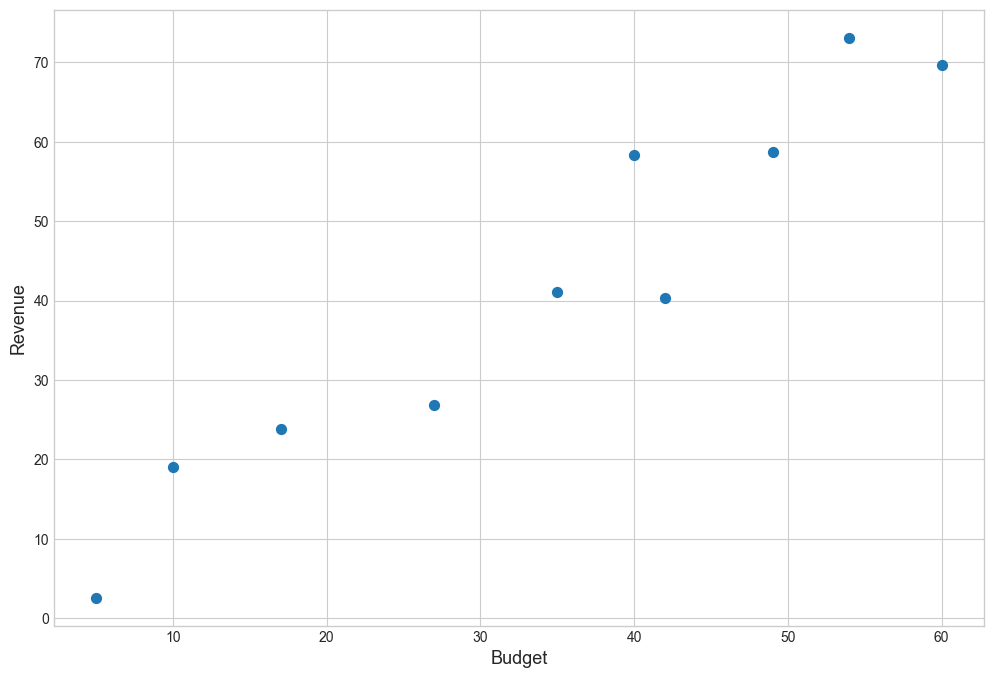

In [6]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50)
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.show()

<h3> Relación Lineal entre Presupuesto y Ganacias</h3>

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lm = LinearRegression(fit_intercept=True)

In [9]:
lm.fit(X = df.budget.to_frame(), y = df.revenue) # ajuste del modelo (regresión lineal)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
slope = lm.coef_ # pendiente de la recta de regresión
slope

array([1.19897684])

In [11]:
intercept = lm.intercept_ # corte con el eje y de la recta de regresión
intercept

np.float64(0.7046849757673712)

En el próximo paso podemos predecir las ganacias de las películas basados en el presupuesto y la recta de regresión lineal.  
Realmente esto no corresponde a una predicción porque estos no son datos nuevos o frescos y sus ganancias ya son conocidas.

 


Aun así, podemos predecir los ingresos basándonos en el modelo lineal. Podemos hacerlo sin predecir, y tenemos que pasar, de nuevo, la variable independiente "presupuesto" y crear la nueva columna "pred".

In [12]:
df["pred"] = lm.predict(df.budget.to_frame())
df

,revenue,budget,pred
0,2.6,5,6.699569
1,19.0,10,12.694453
2,23.8,17,21.087291
3,26.9,27,33.077060
4,41.1,35,42.668875
5,58.3,40,48.663759
6,40.3,42,51.061712
7,58.7,49,59.454550
8,73.1,54,65.449435
9,69.7,60,72.643296


Así que aquí tenemos los ingresos reales del presupuesto y las predicciones de ingresos basadas en el modelo lineal.
En la primera película, la predicción es de ingresos de 6.7 millones, mientras que los ingresos reales son de solo 2.6 millones.
Y también aquí, es mejor visualizar esto, ya que, de hecho, una línea recta se describe completamente con dos puntos de datos.
Así que, creemos dos puntos de datos con los valores X de 0 y 100.
Y luego pasamos los puntos de datos a nuestra ecuación lineal.
Así que los valores de Y son iguales a la intersección, más la pendiente multiplicada por los valores de X.  
Y, al hacerlo, calculamos los valores Y correspondientes a los valores X, el cero y el cien.
Así que veamos.

In [13]:
x_lin = np.array([0, 100])
y_lin = intercept + slope * x_lin

In [14]:
y_lin

array([  0.70468498, 120.60236941])

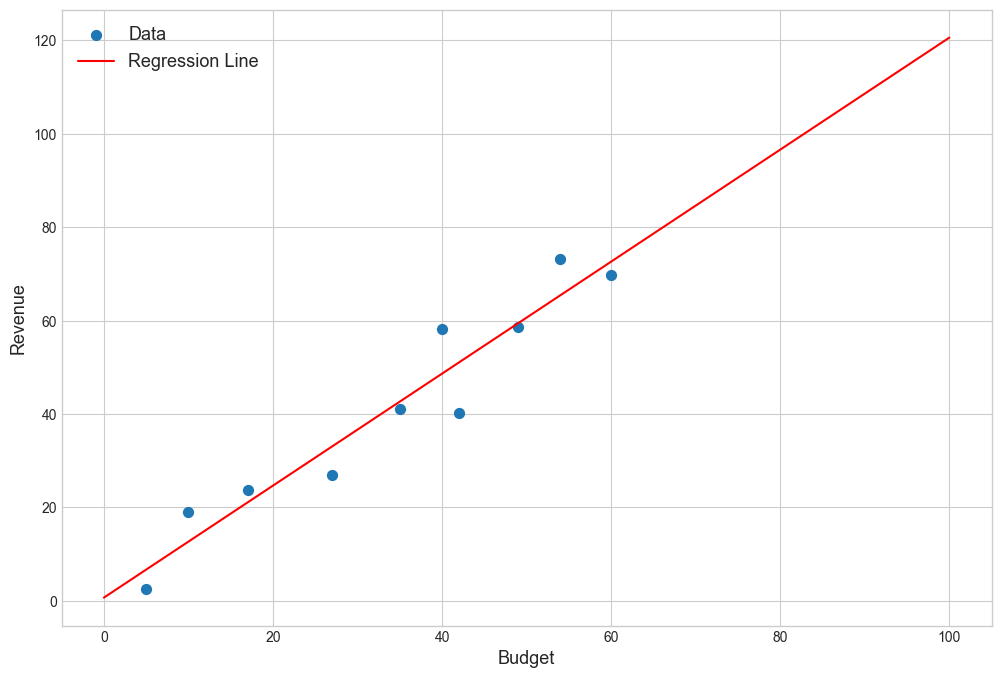

In [15]:
plt.figure(figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

<h3> Realizando Predicciones con Regresión LIneal </h3>
Se usan datos nuevos de presupuesto ganancias de películas

In [16]:
budget_new = np.array([63, 66, 74, 80, 85])

In [17]:
revenue_new = np.array([74.2, 80.7, 98.2, 94.8, 101.7])

In [18]:
df_new = pd.DataFrame(data = {"revenue": revenue_new, "budget": budget_new})
df_new

,revenue,budget
0,74.2,63
1,80.7,66
2,98.2,74
3,94.8,80
4,101.7,85


De nuevo organizamos los nuevos datos en el dataframe df_new. Recordar que nuestro modelo de reresion lineal lm fué ajustado con los datos originales correspondientes a 10 películas.  
Entonces, basados en este modelo podemos predecir las ganancias de los nuevos datos y comparar la predicción con las ganancias reales. Esto se hace simplemente con lm.predict y pasándole los datos de presupuesto como un dataframe y creando la columna predict:


In [19]:
df_new["pred"] = lm.predict(df_new.budget.to_frame())
df_new

,revenue,budget,pred
0,74.2,63,76.240226
1,80.7,66,79.837157
2,98.2,74,89.428971
3,94.8,80,96.622833
4,101.7,85,102.617717


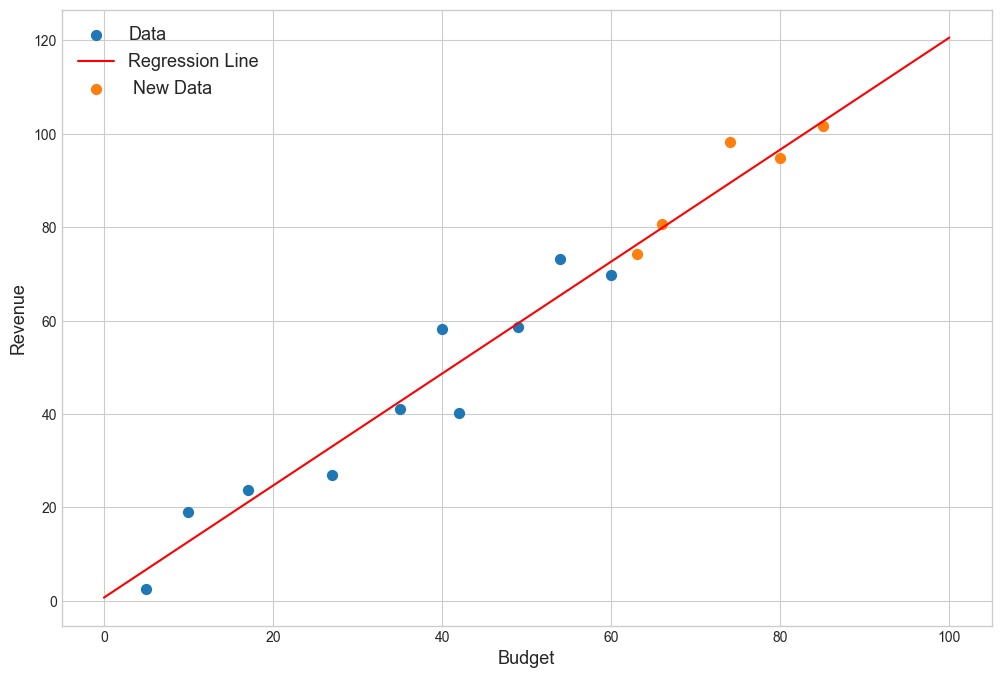

In [20]:
plt.figure(figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = " New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

<h3> Sobreajuste </h3>
Muchas nuestro modelo lineal no se ajusta perfectamente a los datos de entrenamiento, sobre todo por la presencia de "ruido" lo cual no puede ser expresado por el modelo. Estos datos que tienen un comportamiento raro, llamados también "outliers" se pueden tomar en cuenta bien sea cambiando el modelo de lineal a polinómico por ejemplo, o también, aumentando el número de características o roles.  
A continuación un ejemplo de modelo polinómico.


In [21]:
poly_m = np.polyfit(x = df.budget, y = df.revenue, deg = 9)
poly_m # se van a ajustar los datos con un polinomio de grado 9

array([ 2.31988761e-09, -6.91663856e-07,  8.80409587e-05, -6.24271101e-03,
        2.69731803e-01, -7.29512945e+00,  1.21996447e+02, -1.19724559e+03,
        6.13254338e+03, -1.21710591e+04])